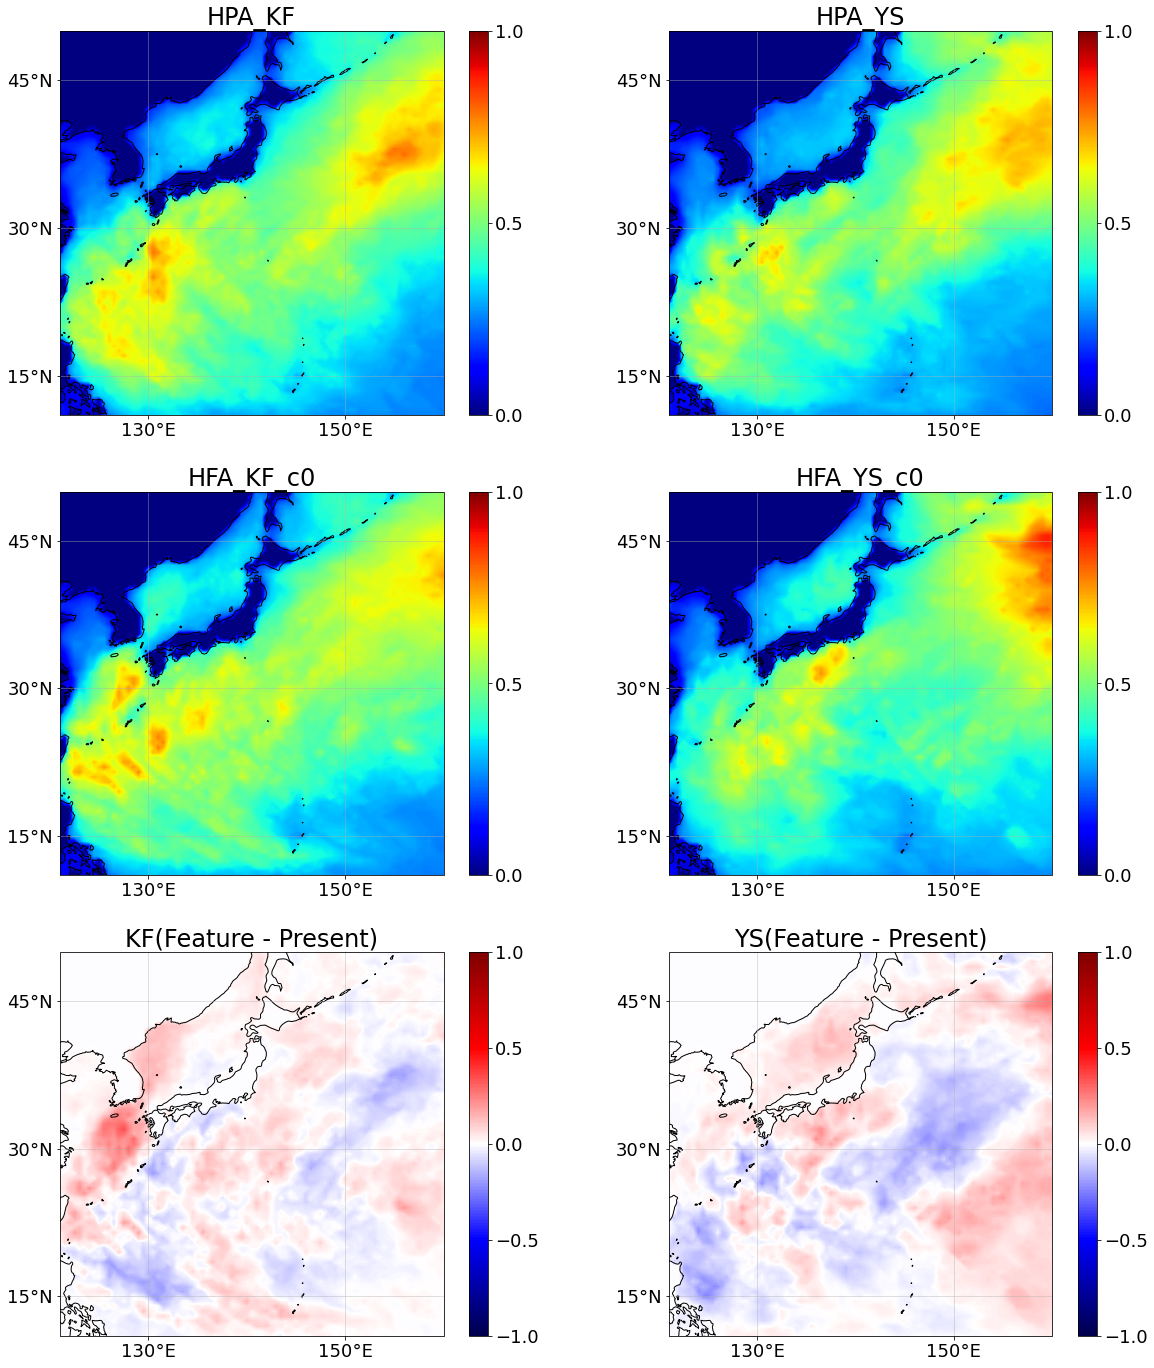

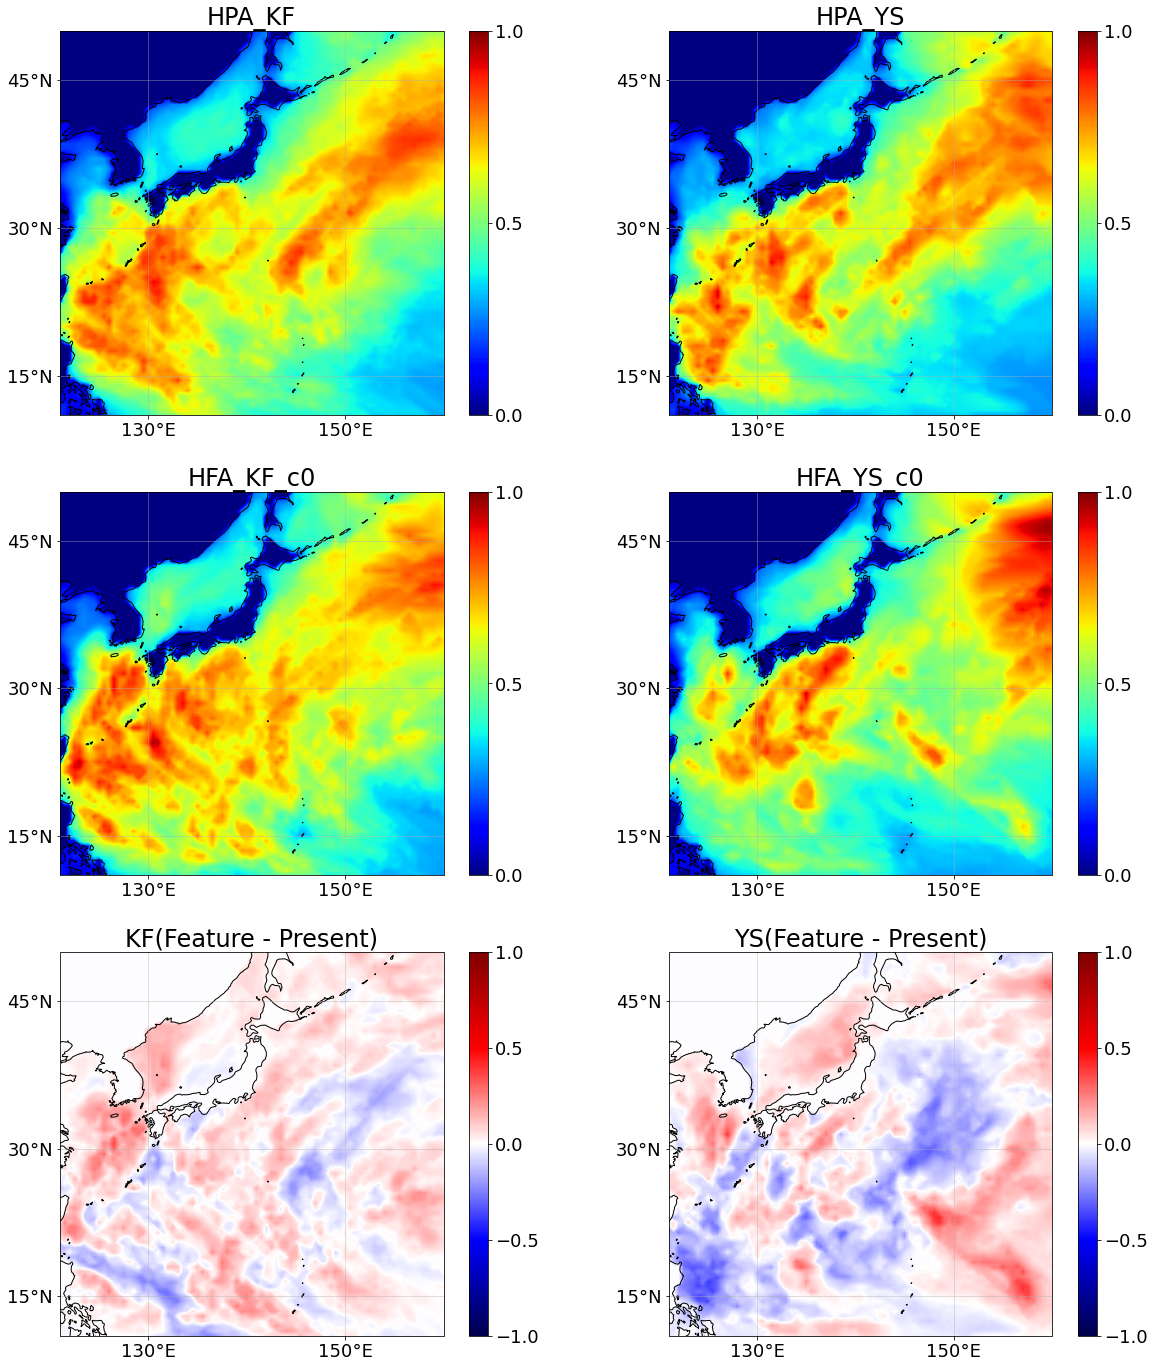

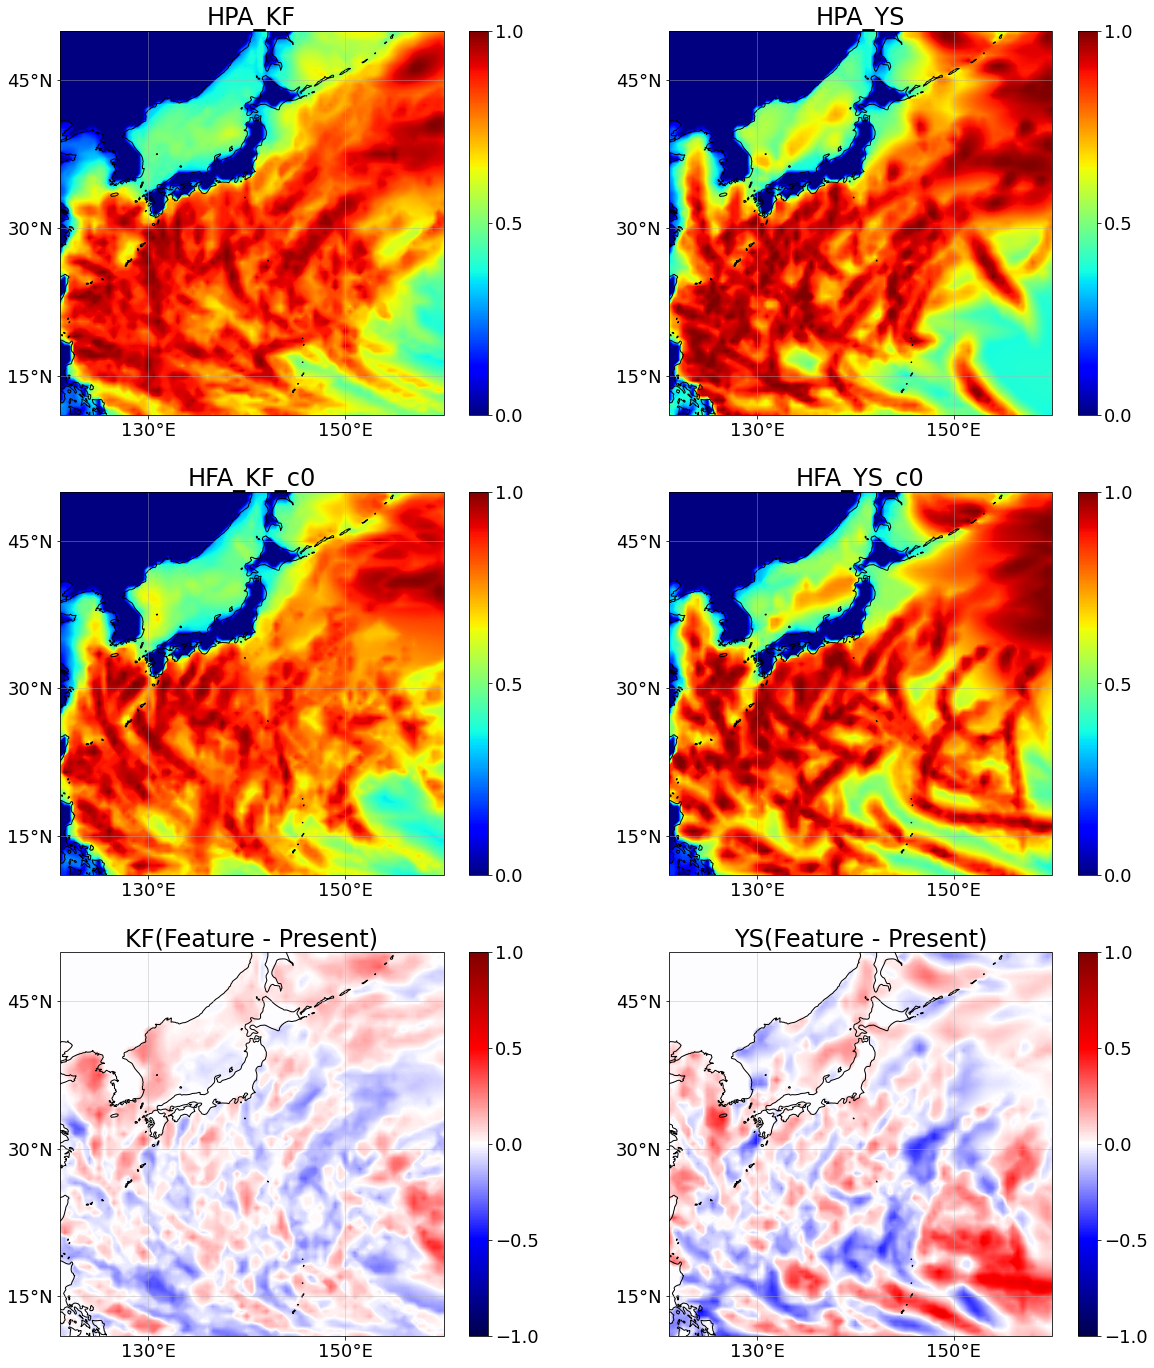

In [72]:
import pygrib
import os
import csv
import numpy as np
import math
from csv import reader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import copy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as ticker

with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

MODEL = ['HPA_KF', 'HFA_KF_c0', 'HPA_YS', 'HFA_YS_c0']
for PERCENT in [0.9, 0.95, 0.99]:
    fig = plt.figure(figsize=(20, 24))
    for model_num in range(2):
        STM_LIST = []
        MAP_LIST = []
        for time in range(2):
            model = MODEL[model_num * 2 + time]
            STM_DATA = []
            with open('../Ex_csv/' + model + '_max.csv', 'r') as csv_file:
                csv_reader = reader(csv_file)
                STM = list(csv_reader)
            with open('../Ex_csv/' + model + '_ex_idx.csv', 'r') as csv_file:
                csv_reader = reader(csv_file)
                INDEX = list(csv_reader)
            # STMを探索し, Exposureを算出
            for j in range(len(INDEX[0])):
                mx = 0
                for k in range(79 * 79):
                    mx = max(mx, float(STM[k][j]))
                STM_DATA.append(mx)
                for k in range(79 * 79):
                    STM[k][j] = float(STM[k][j]) / mx
            
            STM_LIST.append(STM)

            with open('../Ex_csv/' + model + '_ex_ratio.csv', 'w') as file:
                writer = csv.writer(file, lineterminator='\n')
                writer.writerows(STM)

            with open('../Ex_csv/' + model + '_STM.csv', 'w') as file:
                writer = csv.writer(file, lineterminator='\n')
                writer.writerow(STM_DATA)

            # ここまでで現在/将来のExposureが算出されている
            MAP = np.zeros((79, 79))
            per = int(len(STM[0]) * PERCENT)
            for i in range(79 * 79):
                MAP[i // 79][i % 79] = sorted(STM[i])[per]
            MAP_LIST.append(MAP)
            levels = np.arange(0, 1.001, 0.001)
            cmap = copy.copy(mpl.cm.get_cmap("jet"))
            ax = fig.add_subplot(3, 2, model_num + time * 2 + 1, projection=ccrs.PlateCarree())
            a = plt.contourf(lons, lats, MAP, levels=levels, transform=ccrs.PlateCarree(), cmap=cmap)
            c_bar = plt.colorbar(a, ticks=[0, 0.5, 1])
            c_bar.ax.tick_params(labelsize=18)
            c_bar.ax.yaxis.set_minor_locator(ticker.NullLocator())
            ax.set_xticks([130,150], crs=ccrs.PlateCarree()) # gridを引く経度を指定 360にすると0Wが出ない
            ax.set_yticks([15, 30, 45], crs=ccrs.PlateCarree()) # gridを引く緯度を指定
            lon_formatter = LongitudeFormatter(zero_direction_label=True) # 経度
            lat_formatter = LatitudeFormatter() # 緯度。formatを指定することも可能
            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
            ax.axes.tick_params(labelsize=18)
            ax.grid()
            ax.coastlines()
            ax.set_title(model, fontsize=24)
            gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, alpha=0.5) # 経度線・緯度線ラベルを無効
            gl.xlocator = ticker.FixedLocator([130, 150]) # 経度線
            gl.ylocator = ticker.FixedLocator([15, 30, 45]) # 緯度線
        # F - P    
        levels = np.arange(-1, 1.001, 0.001)
        cmap = copy.copy(mpl.cm.get_cmap("seismic"))
        ax = fig.add_subplot(3, 2, 5 + model_num, projection=ccrs.PlateCarree())
        a = plt.contourf(lons, lats, MAP_LIST[1] - MAP_LIST[0], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap)
        c_bar = plt.colorbar(a, ticks=[-1, -0.5, 0, 0.5, 1])
        c_bar.ax.tick_params(labelsize=18)
        c_bar.ax.yaxis.set_minor_locator(ticker.NullLocator())
        ax.set_xticks([130,150], crs=ccrs.PlateCarree()) # gridを引く経度を指定 360にすると0Wが出ない
        ax.set_yticks([15, 30, 45], crs=ccrs.PlateCarree()) # gridを引く緯度を指定
        lon_formatter = LongitudeFormatter(zero_direction_label=True) # 経度
        lat_formatter = LatitudeFormatter() # 緯度。formatを指定することも可能
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.axes.tick_params(labelsize=18)
        ax.grid()
        ax.set_title(model[4:6] + "(Feature - Present)", fontsize=24)
        ax.coastlines()
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, alpha=0.5) # 経度線・緯度線ラベルを無効
        gl.xlocator = ticker.FixedLocator([130, 150]) # 経度線
        gl.ylocator = ticker.FixedLocator([15, 30, 45]) # 緯度線

    plt.savefig('../img/changes_of_exposure_' + str(PERCENT) + '.png')
    plt.show()

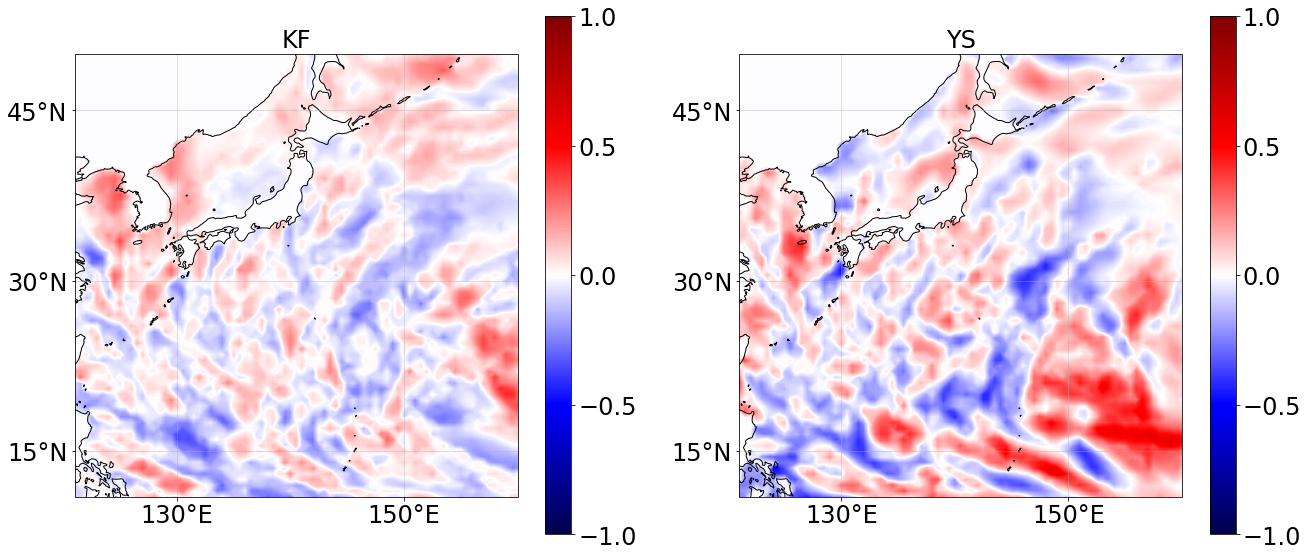

0.6694439993590771
0.7646210543182183


In [13]:
import pygrib
import os
import csv
import numpy as np
import math
from csv import reader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import copy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as ticker

with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

EX_P = []
EX_F = []

# 要旨用
MODEL = ['HPA_KF', 'HFA_KF_c0', 'HPA_YS', 'HFA_YS_c0']
for PERCENT in [0.99]:
    fig = plt.figure(figsize=(18, 8))
    for model_num in range(2):
        STM_LIST = []
        MAP_LIST = []
        for time in range(2):
            model = MODEL[model_num * 2 + time]
            STM_DATA = []
            with open('../Ex_csv/' + model + '_max.csv', 'r') as csv_file:
                csv_reader = reader(csv_file)
                STM = list(csv_reader)
            with open('../Ex_csv/' + model + '_ex_idx.csv', 'r') as csv_file:
                csv_reader = reader(csv_file)
                INDEX = list(csv_reader)
            # STMを探索し, Exposureを算出
            for j in range(len(INDEX[0])):
                mx = 0
                for k in range(79 * 79):
                    mx = max(mx, float(STM[k][j]))
                STM_DATA.append(mx)
                for k in range(79 * 79):
                    STM[k][j] = float(STM[k][j]) / mx
            
            STM_LIST.append(STM)

            with open('../Ex_csv/' + model + '_ex_ratio.csv', 'w') as file:
                writer = csv.writer(file, lineterminator='\n')
                writer.writerows(STM)

            with open('../Ex_csv/' + model + '_STM.csv', 'w') as file:
                writer = csv.writer(file, lineterminator='\n')
                writer.writerow(STM_DATA)
                
            # ここまでで現在/将来のExposureが算出されている
            MAP = np.zeros((79, 79))
            per = int(len(STM[0]) * PERCENT)
            for i in range(79 * 79):
                MAP[i // 79][i % 79] = sorted(STM[i])[per]
            MAP_LIST.append(MAP)
        # F - P    
        levels = np.arange(-1, 1.001, 0.001)
        cmap = copy.copy(mpl.cm.get_cmap("seismic"))
        ax = fig.add_subplot(1, 2, 1 + model_num, projection=ccrs.PlateCarree())
        a = plt.contourf(lons, lats, MAP_LIST[1] - MAP_LIST[0], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap)
        c_bar = plt.colorbar(a, ticks=[-1, -0.5, 0, 0.5, 1])
        c_bar.ax.tick_params(labelsize=24)
        c_bar.ax.yaxis.set_minor_locator(ticker.NullLocator())
        ax.set_xticks([130,150], crs=ccrs.PlateCarree()) # gridを引く経度を指定 360にすると0Wが出ない
        ax.set_yticks([15, 30, 45], crs=ccrs.PlateCarree()) # gridを引く緯度を指定
        lon_formatter = LongitudeFormatter(zero_direction_label=True) # 経度
        lat_formatter = LatitudeFormatter() # 緯度。formatを指定することも可能
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.axes.tick_params(labelsize=24)
        ax.grid()
        ax.set_title(model[4:6], fontsize=24)
        ax.coastlines()
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, alpha=0.5) # 経度線・緯度線ラベルを無効
        gl.xlocator = ticker.FixedLocator([130, 150]) # 経度線
        gl.ylocator = ticker.FixedLocator([15, 30, 45]) # 緯度線

        EX_P.append(MAP_LIST[0])
        EX_F.append(MAP_LIST[1])
    fig.subplots_adjust(left=0.05, right=0.99, bottom=0.05, top=0.95) #この1行を入れる
    plt.savefig('../img/changes_of_exposure_' + str(PERCENT) + '_for_sum.png')
    plt.show()


MODEL = ['KF', 'YS']
DATA_F = []
DATA_P = []

with open('../100y_vizualize(100)(thr=6)/RV_csv/HFA_KF.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('../100y_vizualize(100)(thr=6)/RV_csv/HPA_KF.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))
with open('../100y_vizualize(100)(thr=6)/RV_csv/HFA_YS.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('../100y_vizualize(100)(thr=6)/RV_csv/HPA_YS.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))

# str → float
for i in range(79):
    for j in range(79):
        for k in range(2):
            if float(DATA_F[k][i][j]) > 0:
                DATA_F[k][i][j] = float(DATA_F[k][i][j])
            else:
                DATA_F[k][i][j] = -0.01
            if float(DATA_P[k][i][j]) > 0:
                DATA_P[k][i][j] = float(DATA_P[k][i][j])
            else:
                DATA_P[k][i][j] = -0.01

# list → np-array
for i in range(2):
    DATA_F[i] = np.array(DATA_F[i])
    DATA_P[i] = np.array(DATA_P[i])

## KFの合致率
print(len(np.where((DATA_F[0] - DATA_P[0]) * (EX_F[0] - EX_P[0]) >= 0)[0]) / (79*79))
## YSの合致率
print(len(np.where((DATA_F[1] - DATA_P[1]) * (EX_F[1] - EX_P[1]) >= 0)[0]) / (79*79))